## Tutorial 11: Neural Networks

In this tutorial, you are supposed to design a convolutional neural network for a familiar data set—the ZIP code data. We will use the images for all ten digits as the training set, and evaluate the model on a separate test set. zip.train and zip.test can be downloaded on Canvas.

We recommend you to use Keras. Keras is a high-level neural networks API, written in Python. You can find the installation instructions and a brief introduction at https://keras.io. Before installing Keras, make sure that you have installed Python (https://www.python.org) on you computer (either Python 2 or 3). IPython Notebook (https://ipython.org/notebook.html) is also recommended. There are several examples of Keras with Python code provided at https://github.com/fchollet/keras/tree/master/examples.

Here, we have a classification problem with ten classes. The inputs are 16 × 16 images. We will design a convolutional neural network for this problem. 

In [11]:
from __future__ import print_function
import numpy as np
import csv
np.random.seed(1337)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [3]:
batch_size =32
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 16, 16

In [4]:
train = np.loadtxt("zip.train")
test = np.loadtxt("zip.test")

In [5]:
x_train = train[:, 1:].astype('float32')
y_train = train[:, 0]
x_test = test[:, 1:].astype('float32')
y_test = test[:, 0]

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = ( 1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = ( img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


In [7]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [12]:
# build the model sequentially
model = Sequential()

model.add(Convolution2D(16, 2, 2, border_mode='same',
                        input_shape= input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(BatchNormalization(epsilon=0.001, axis=-1, momentum=0.99, weights=None, beta_init='zero', gamma_init='ones', gamma_regularizer=None, beta_regularizer=None))
model.add(Activation('relu'))
model.add(BatchNormalization(epsilon=0.001, axis=-1, momentum=0.99, weights=None, beta_init='zero', gamma_init='ones', gamma_regularizer=None, beta_regularizer=None))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), padding="same", input_shape=(16, 16, 1...)`
/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2))`
/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2), padding="same")`
/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2))`
/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(beta_regularizer=None, epsilon=0.001, beta_initializer="zero", gamma_initializer="ones", weights=None, gamma_regularizer=None, momentum=0

In [13]:
# This is a function that adds little noise to training data
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=6,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [14]:
# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [15]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch = epochs,
                    validation_data=(x_test, y_test))

/Users/linxiliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=30, validation_data=(array([[[..., steps_per_epoch=227)`


Epoch 1/30
227/227 [==============================] - 3s - loss: 1.3001 - acc: 0.5748 - val_loss: 2.1644 - val_acc: 0.6721
Epoch 2/30
227/227 [==============================] - 2s - loss: 0.5699 - acc: 0.8219 - val_loss: 0.6682 - val_acc: 0.8994
Epoch 3/30
227/227 [==============================] - 2s - loss: 0.3970 - acc: 0.8740 - val_loss: 0.2234 - val_acc: 0.9372
Epoch 4/30
227/227 [==============================] - 2s - loss: 0.3247 - acc: 0.8973 - val_loss: 0.1908 - val_acc: 0.9392
Epoch 5/30
227/227 [==============================] - 2s - loss: 0.2876 - acc: 0.9067 - val_loss: 0.1473 - val_acc: 0.9567
Epoch 6/30
227/227 [==============================] - 2s - loss: 0.2422 - acc: 0.9269 - val_loss: 0.1511 - val_acc: 0.9562
Epoch 7/30
227/227 [==============================] - 2s - loss: 0.2179 - acc: 0.9306 - val_loss: 0.1393 - val_acc: 0.9571
Epoch 8/30
227/227 [==============================] - 2s - loss: 0.2069 - acc: 0.9348 - val_loss: 0.1208 - val_acc: 0.9636
Epoch 9/30
227/2

In [17]:
# prediction accuracy of the fitted model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.121616516067
Test accuracy: 0.971101146108


We will compare this model to a linear model---a generalized linear model with $L_1$ penalty. Here is the result. First, we set the tuning parameter to be 1.

In [18]:
import numpy as np
import numpy.random as npr
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x_train = train[:, 1:]
y_train = train[:, 0].astype(np.int32)
x_test = test[:, 1:]
y_test = test[:, 0].astype(np.int32)

In [21]:
lr = skl.LogisticRegression(penalty="l1", multi_class='multinomial', C=1, solver='saga')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
err = np.mean(y_pred != y_test)
print("The prediction accuracy under C=1 is {0}".format(1 - err))

The prediction accuracy under C=1 is 0.912805181863


/Users/linxiliu/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We use cross validation to select the tuning parameter.

In [ ]:
Cs = np.exp(np.linspace(-5, 8, 20))
nfold = 5
lrCV = skl.LogisticRegressionCV(Cs=Cs,
                                cv=nfold, penalty="l1",
                                solver='saga',
                                multi_class="multinomial",
                                scoring="neg_log_loss",
                                refit=True)
lrCV.fit(x_train, y_train)

In [17]:
y_pred_optimal = lrCV.predict(x_test)
err_optimal = np.mean(y_pred_optimal != y_test)
print("The optimal tuned prediction accuracy (5-fold CV) is {0}".format(1 - err_optimal))

The optimal tuned prediction accuracy (5-fold CV) is 0.911808669656


In [18]:
score_avg = -np.mean(lrCV.scores_[0], axis=0)
score_std = np.std(lrCV.scores_[0], axis=0) / np.sqrt(nfold)

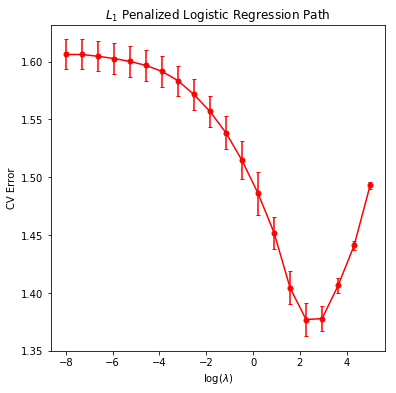

In [25]:
fg = plt.figure(figsize=(6, 6))
ax = fg.add_subplot(1, 1, 1)
ax.set_title("$L_1$ Penalized Logistic Regression Path")
ax.set_xlabel("$\log(\lambda)$")
ax.set_ylabel("CV Error")
ax.errorbar(-np.log(Cs), score_avg, yerr=score_std, capsize=2, marker='.', ms=10, mfc="red", color="red", ecolor="red")
ax.legend(loc="best")

The performance of convolutional neural networks is better than the linear method.